In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *

import numpy as np

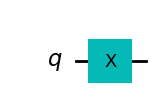

In [3]:
qc = QuantumCircuit(1)    # Create a circuit with 1 qubit
qc.x(0)
qc.draw()

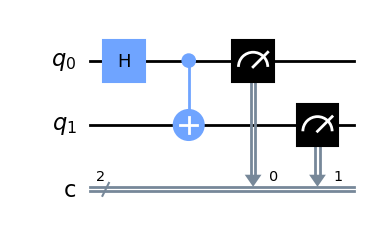

In [4]:
bell = QuantumCircuit(2, 2)     # Create a circuit with 2 qubits and 2 classical bits

bell.h(0) # apply an H gate to the circuit
bell.cx(0,1) # apply a CNOT gate to the circuit
bell.measure([0,1], [0,1])  # measure qubits 0 and 1, and store the results in classical bits 0 and 1

bell.draw(output="mpl")

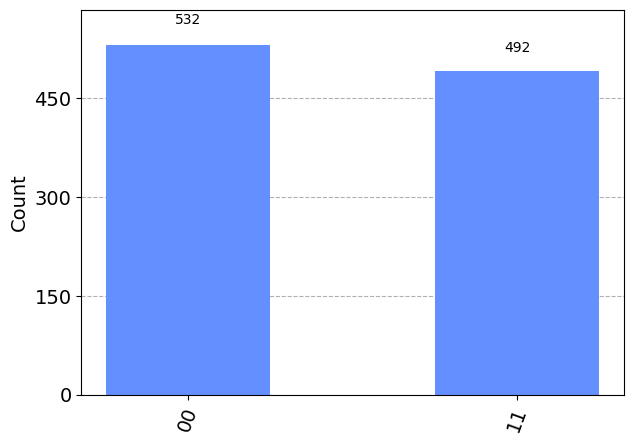

In [5]:
from qiskit_aer import AerSimulator

simulator = AerSimulator()
job = simulator.run(bell)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

PART 1: Can you explain why the circuit above gives the state $1/\sqrt{2} \Big(|00\rangle + |11\rangle \Big)$

Answer:

Because the Hadamard gate maps the first qubit to |+>, then $\text{CNOT} |+0>$ =  $1/\sqrt{2} \Big(|00\rangle + |11\rangle \Big)$

The reason why it is not exactly 50% is due to physical errors on the system (e.g. gate fidelity error, dephasing, etc.)

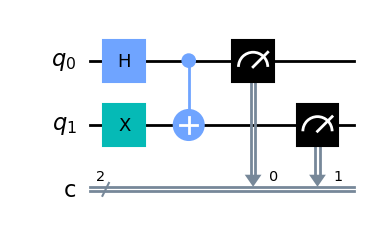

In [6]:
bell2 = QuantumCircuit(2, 2)     # Create a circuit with 2 qubits and 2 classical bits

bell2.h(0) # apply an H gate to the circuit
bell2.x(1) # apply an X gate to the circuit
bell2.cx(0,1) # apply a CNOT gate to the circuit
bell2.measure([0,1], [0,1])  # measure qubits 0 and 1, and store the results in classical bits 0 and 1

bell2.draw(output="mpl")

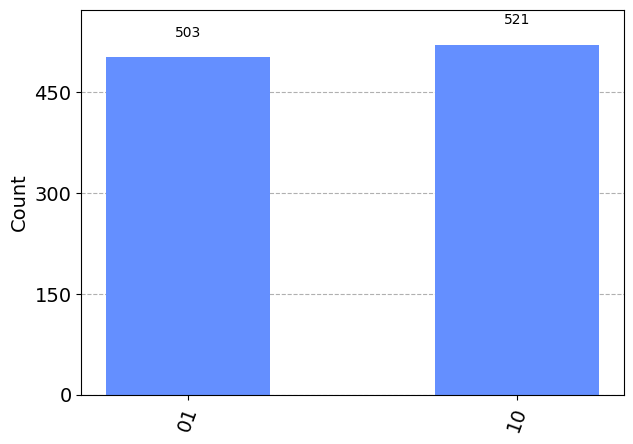

In [10]:
simulator2 = AerSimulator()
job2 = simulator2.run(bell2)
result2 = job2.result()
counts2 = result2.get_counts()
plot_histogram(counts2)

Size: 6
Number of gates: 2


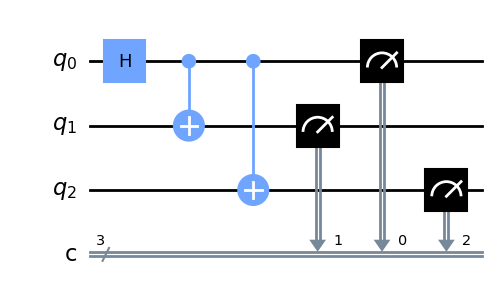

In [11]:
ghz_qc = QuantumCircuit(3, 3)

ghz_qc.h(0)
ghz_qc.cx(0,1)
ghz_qc.cx(0,2)
ghz_qc.measure(range(3), range(3))

print("Size:", ghz_qc.size())
print("Number of gates:", ghz_qc.num_nonlocal_gates())
ghz_qc.draw()

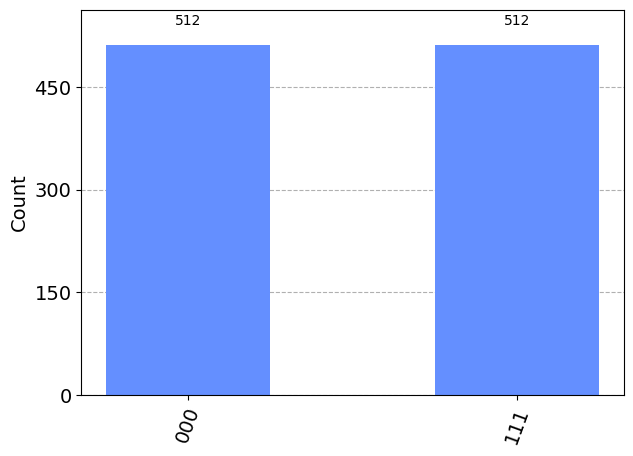

In [12]:
simulator = AerSimulator()
job = simulator.run(ghz_qc)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

PART 3: Create a function that can generate the GHZ state to an arbitrary number of qubits. How does the depth of the circuit scale with the number of qubits?

In [27]:
def create_GHZ_N(N):
    ghz_qc = QuantumCircuit(N, N)
    
    ghz_qc.h(0)
    
    for i in range(1, N):
        ghz_qc.cx(0,i)
    
    
    ghz_qc.measure(range(N), range(N))
    print("Size:", ghz_qc.size())
    print("Number of gates:", ghz_qc.num_nonlocal_gates())
    print(ghz_qc.draw())
    
    return(ghz_qc)
    

Size: 40
Number of gates: 19
Figure(2228.78x3628.72)


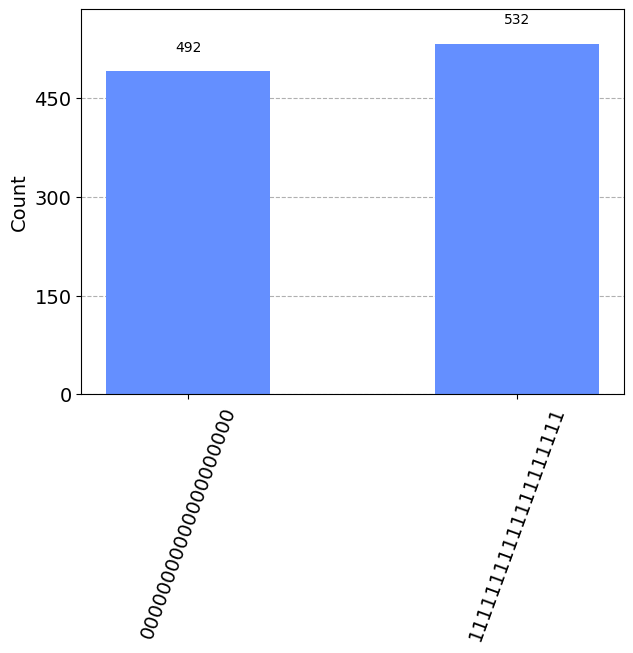

In [36]:
test_N = 20

ghz_qcN = create_GHZ_N(test_N)

ghz_qcN.draw()

simulatorN = AerSimulator()
jobN = simulator.run(ghz_qcN)
resultN = jobN.result()
countsN = resultN.get_counts()
plot_histogram(countsN)

PART 3: Create a function that can generate the GHZ state to an arbitrary number of qubits. How does the depth of the circuit scale with the number of qubits?

Answer: The number of nonlocal gates scales as 2N, where N is the number of qubits

7


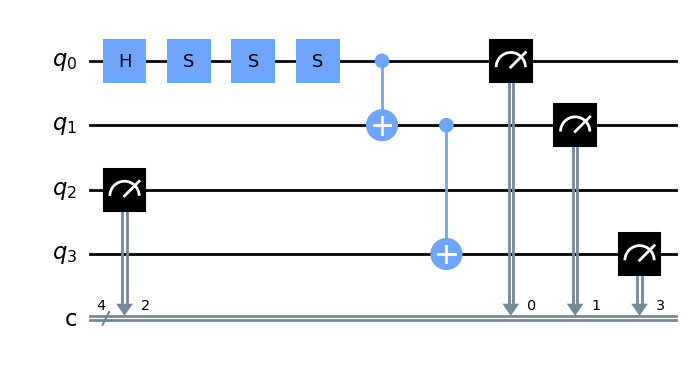

In [47]:
qc = QuantumCircuit(4, 4)

qc.h(0)
qc.s(0)
qc.s(0)
qc.s(0)
qc.cx(0,1)
qc.cx(1,3)
qc.measure(range(4), range(4))

print(qc.depth())
qc.draw()

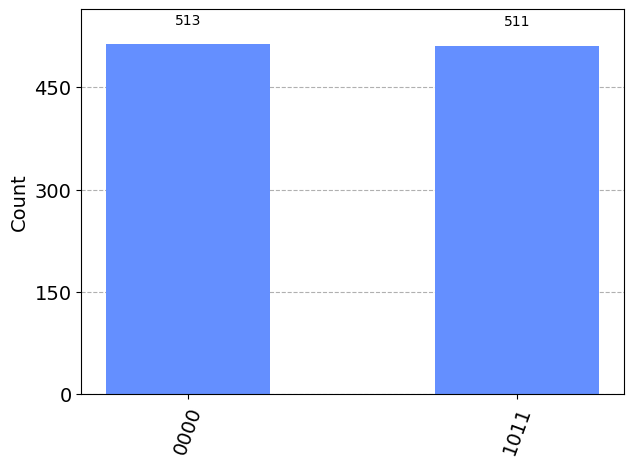

In [48]:
sims = AerSimulator()
jobq1 = sims.run(qc)
resultq1 = jobq1.result()
countsq1 = resultq1.get_counts()
plot_histogram(countsq1)

3


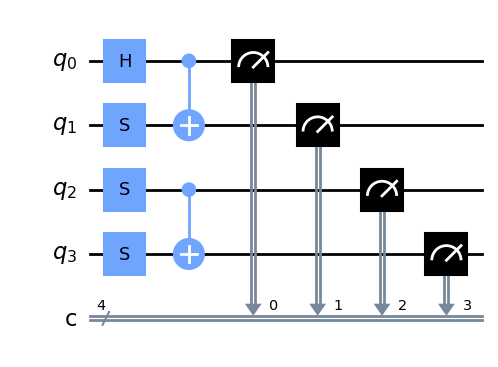

In [49]:
qc2 = QuantumCircuit(4, 4)

qc2.h(0)
qc2.s(1)


qc2.cx(0,1)

qc2.s(2)
qc2.s(3)

qc2.cx(2,3)

qc2.measure(range(4), range(4))

print(qc2.depth())

qc2.draw()

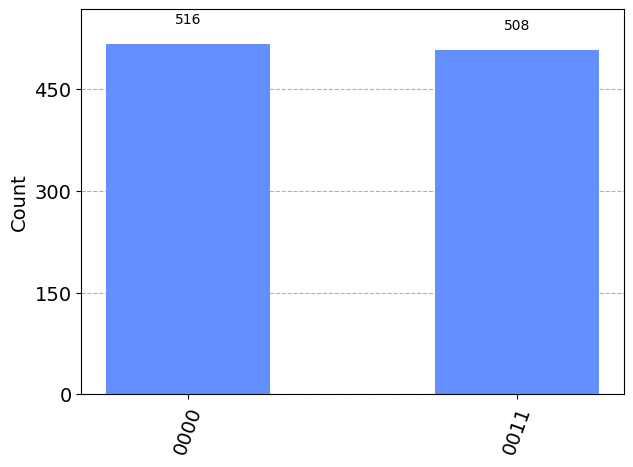

In [50]:
simsq2 = AerSimulator()
jobq2 = simsq2.run(qc2)
resultq2 = jobq2.result()
countsq2 = resultq2.get_counts()
plot_histogram(countsq2)

PART 4: Create a function that generates an GHZ circuit for an arbitrary number of qubits, but with a reduced depth. Demonstrate with by running your function on at least 16 qubits. Explain how your solution addressses the problem of reducing the depth

6


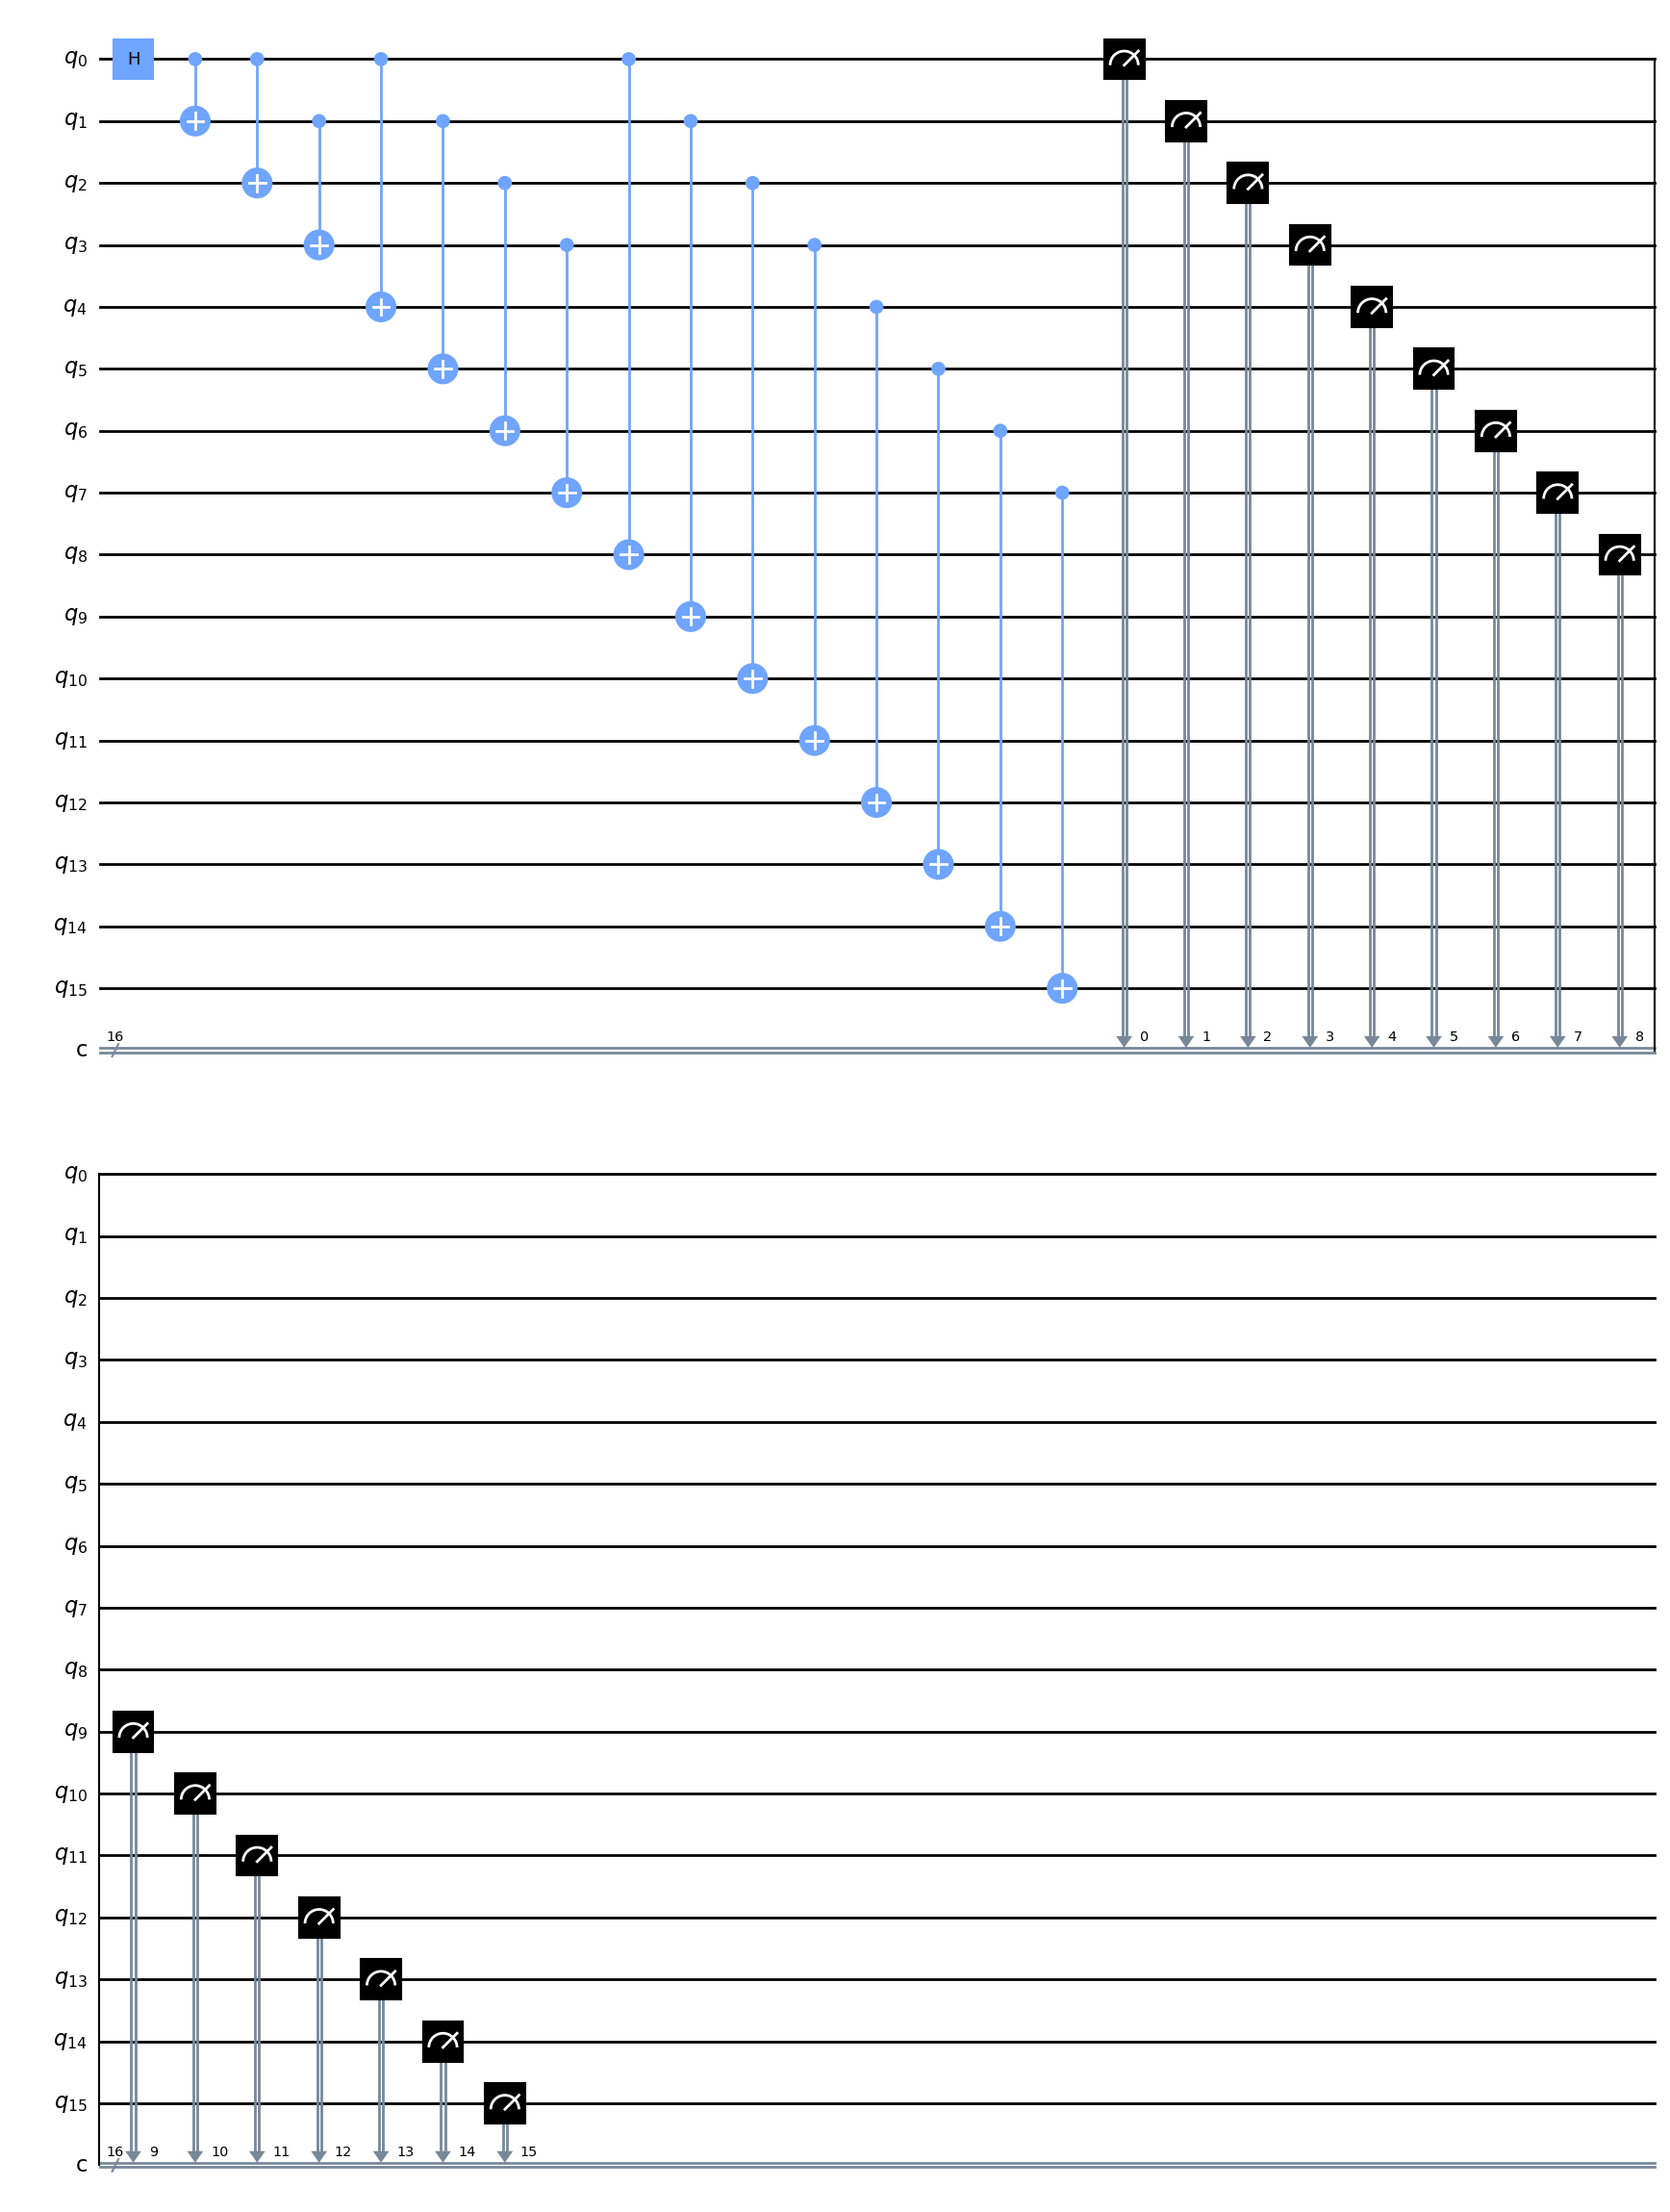

In [62]:
qcGHZ16 = QuantumCircuit(16, 16)

# qcGHZ16.h(0)


qcGHZ16.h(0)
qcGHZ16.cx(0,1)
qcGHZ16.cx(0,2)
qcGHZ16.cx(1,3)
qcGHZ16.cx(0,4)
qcGHZ16.cx(1,5)
qcGHZ16.cx(2,6)
qcGHZ16.cx(3,7)
qcGHZ16.cx(0,8)
qcGHZ16.cx(1,9)
qcGHZ16.cx(2,10)
qcGHZ16.cx(3,11)
qcGHZ16.cx(4,12)
qcGHZ16.cx(5,13)
qcGHZ16.cx(6,14)
qcGHZ16.cx(7,15)


# qcGHZ16.cx(0,8)

# qcGHZ16.cx(0,4)
# qcGHZ16.cx(8,12)

# qcGHZ16.cx(0,2)
# qcGHZ16.cx(4,5)
# qcGHZ16.cx(7,8)
# qcGHZ16.cx(10,11)
# qcGHZ16.cx(13,14)


qcGHZ16.measure(range(16), range(16))

print(qcGHZ16.depth())

qcGHZ16.draw()

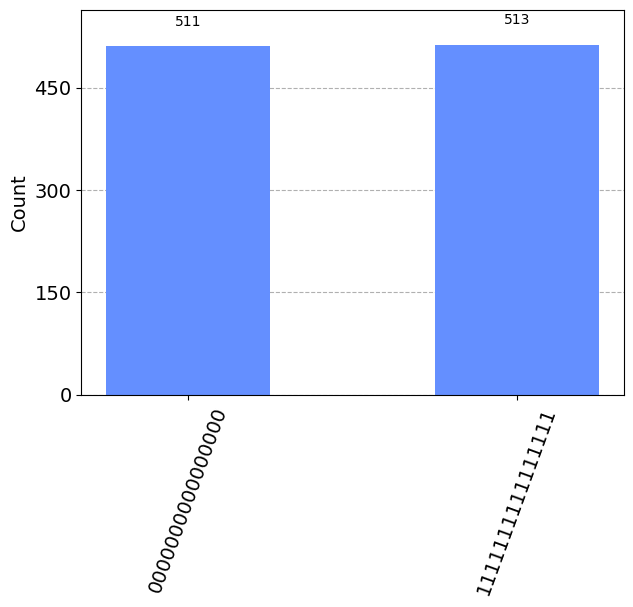

In [63]:
simulator = AerSimulator()
job = simulator.run(qcGHZ16)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

Explanation:

The circuit works by sequentially adding CNOT gates in powers of 2 (2^1, 2^2, 2^3). The sequential cascading CNOTs thus reduce the gate depth to 6. The depth thus scales logarithmically with N ($log_2(N)$)

In [64]:
import qiskit.tools.jupyter
%qiskit_version_table